In [ ]:
import pandas as pd

# Please replace 'your_dataset.csv' with the actual file name of your dataset
try:
    df = pd.read_csv('/content/iot_telemetry_ids_ready.csv')
    display(df.head())
    display(df.columns)
except FileNotFoundError:
    print("Error: Dataset file not found. Please replace 'your_dataset.csv' with the correct file name.")

,ts,device,co,humidity,light,lpg,motion,smoke,temp,device_id,timestamp,label,attack_type
0,1594512094,b8:27:eb:bf:9d:51,0.004956,39.056407,False,0.007651,False,0.020411,29.579211,device_4,01-01-2025 00:00,1,DoS
1,1594512095,00:0f:00:70:91:0a,0.002840,75.050465,False,0.005114,False,0.013275,27.083662,device_3,01-01-2025 00:00,1,Spoofing
2,1594512098,b8:27:eb:bf:9d:51,0.004976,58.902531,False,0.007673,False,0.020475,36.340364,device_2,01-01-2025 00:00,1,Replay
3,1594512100,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,device_2,01-01-2025 00:00,0,Normal
4,1594512102,b8:27:eb:bf:9d:51,0.004967,46.129886,False,0.007664,False,0.020448,31.636413,device_4,01-01-2025 00:00,1,Data Injection


Index(['ts', 'device', 'co', 'humidity', 'light', 'lpg', 'motion', 'smoke',
       'temp', 'device_id', 'timestamp', 'label', 'attack_type'],
      dtype='object')

In [ ]:
attacks_normal_df = df[df['attack_type'].isin(['Normal', 'DoS', 'Spoofing', 'Replay', 'Data Injection'])]

display(attacks_normal_df.groupby('attack_type').describe())

ts                                             \
                   count          mean            std           min   
attack_type                                                           
Data Injection   40397.0  1.594858e+09  199626.319467  1.594512e+09   
DoS              40554.0  1.594857e+09  199532.404958  1.594512e+09   
Normal          202592.0  1.594858e+09  199620.484171  1.594512e+09   
Replay           40712.0  1.594858e+09  198959.785313  1.594512e+09   
Spoofing         40423.0  1.594859e+09  199592.489355  1.594512e+09   

                                                                        \
                         25%           50%           75%           max   
attack_type                                                              
Data Injection  1.594686e+09  1.594856e+09  1.595030e+09  1.595203e+09   
DoS             1.594687e+09  1.594855e+09  1.595029e+09  1.595203e+09   
Normal          1.594686e+09  1.594858e+09  1.595030e+09  1.595203e+09   
Replay          1.594686e+09  1.594859e+09  1.595030e+09  1.595203e+09   
Spoofing        1.594687e+09  1.594860e+09  1.595033e+09  1.595203e+09   

                      co            ...       temp                label       \
                   count      mean  ...        75%        max     count mean   
attack_type                         ...                                        
Data Injection   40397.0  0.004629  ...  35.213294  45.463127   40397.0  1.0   
DoS              40554.0  0.004639  ...  35.183325  45.481131   40554.0  1.0   
Normal          202592.0  0.004640  ...  23.600000  30.600000  202592.0  0.0   
Replay           40712.0  0.004634  ...  35.216114  45.485729   40712.0  1.0   
Spoofing         40423.0  0.004640  ...  35.192661  45.301688   40423.0  1.0   

                                              
                std  min  25%  50%  75%  max  
attack_type                                   
Data Injection  0.0  1.0  1.0  1.0  1.0  1.0  
DoS             0.0  1.0  1.0  1.0  1.0  1.0  
Normal          0.0  0.0  0.0  0.0  0.0  0.0  
Replay          0.0  1.0  1.0  1.0  1.0  1.0  
Spoofing        0.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 56 columns]

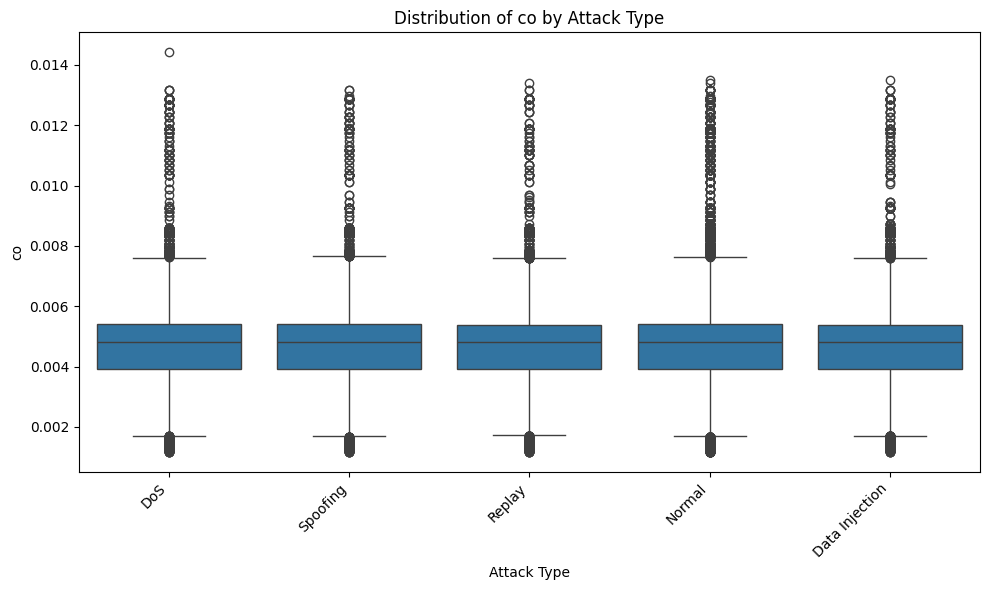

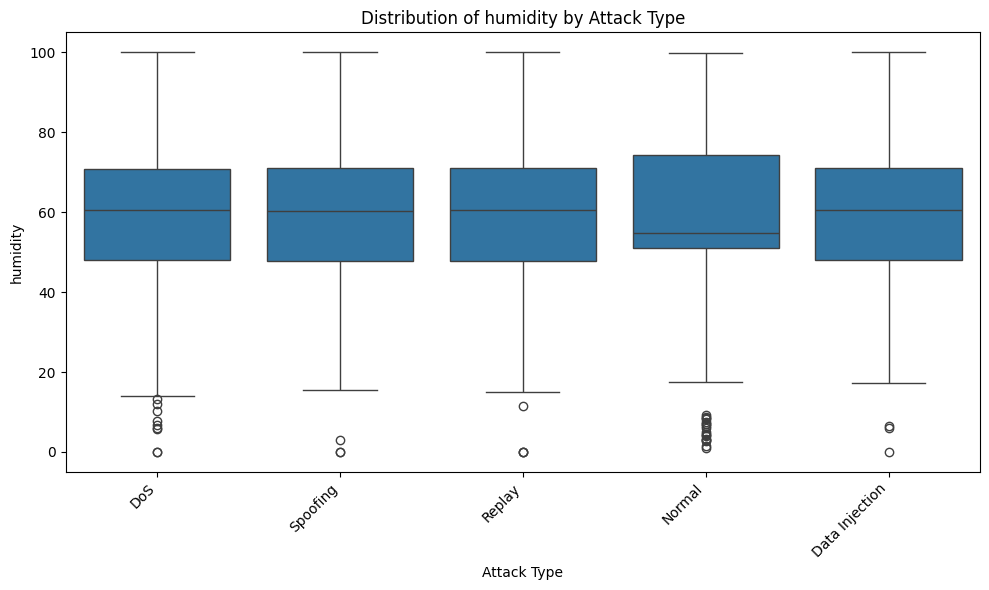

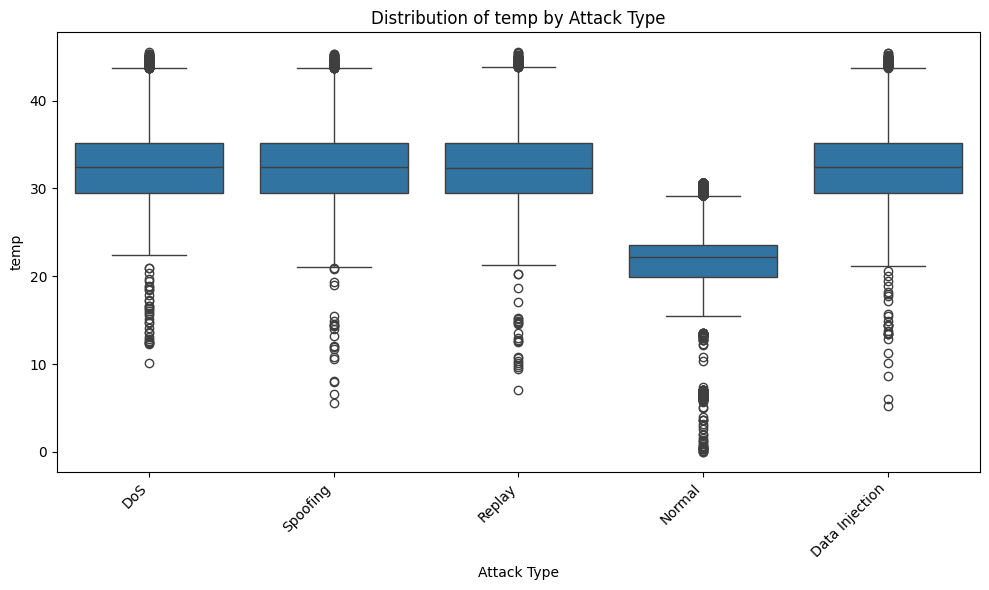

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some numerical features for visualization
numerical_features = ['co', 'humidity', 'temp']

# Create box plots for each numerical feature, grouped by attack_type
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='attack_type', y=feature, data=attacks_normal_df)
    plt.title(f'Distribution of {feature} by Attack Type')
    plt.xlabel('Attack Type')
    plt.ylabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

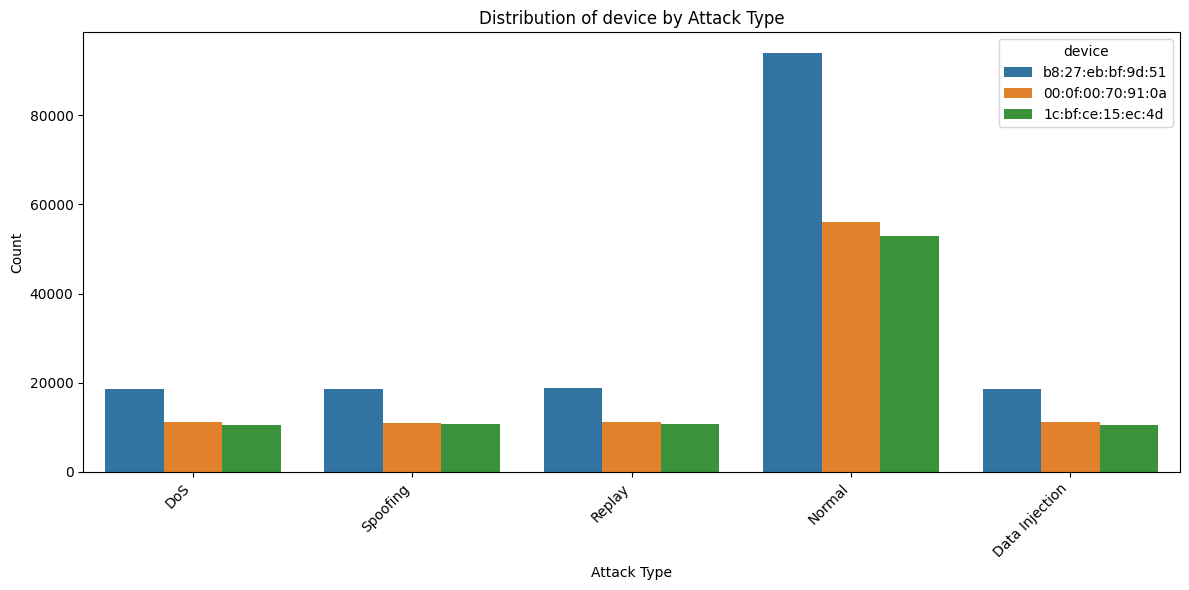

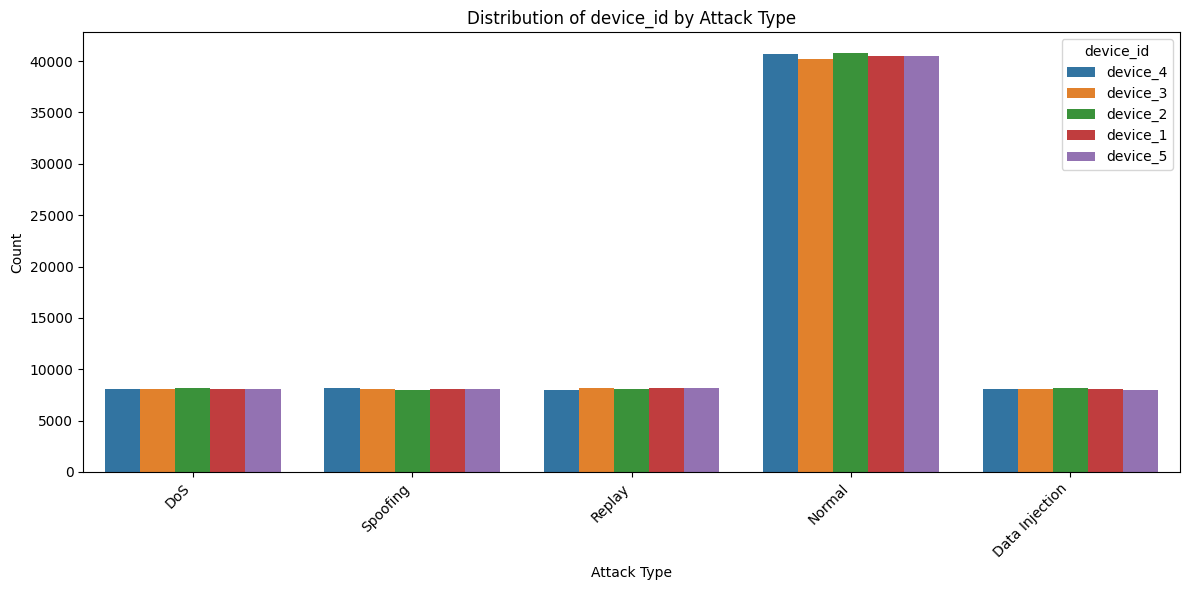

In [ ]:
# Analyze the distribution of categorical features by attack type
categorical_features = ['device', 'device_id']

for feature in categorical_features:
    if feature in attacks_normal_df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(x='attack_type', hue=feature, data=attacks_normal_df)
        plt.title(f'Distribution of {feature} by Attack Type')
        plt.xlabel('Attack Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Categorical feature '{feature}' not found in the DataFrame.")